In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

# Load the dataset
df=pd.read_csv("Dataset .csv")

In [25]:
# Ensure dataset is loaded
if df.empty:
    raise ValueError("Dataset is empty. Please check the file.")

In [26]:


# Convert categorical columns to numerical using encoding
if not df.select_dtypes(include=['object']).empty:
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
else:
    df_encoded = df.copy()


In [27]:
# Define numerical columns early to avoid errors
num_cols = list(df_encoded.select_dtypes(include=['number']).columns)  # Convert to list


In [28]:

# Display basic information
print("Dataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch

<Figure size 1000x600 with 0 Axes>

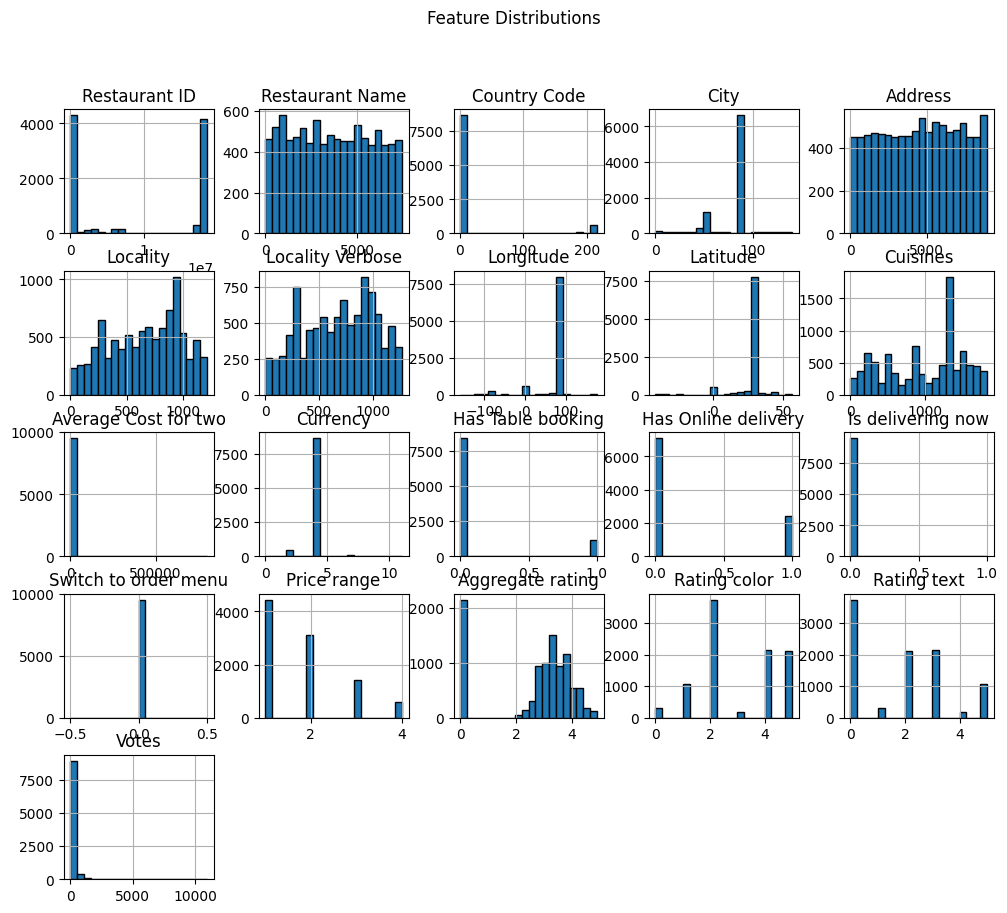

In [30]:


# Plot distributions of numeric features
plt.figure(figsize=(10, 6))
df_encoded.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

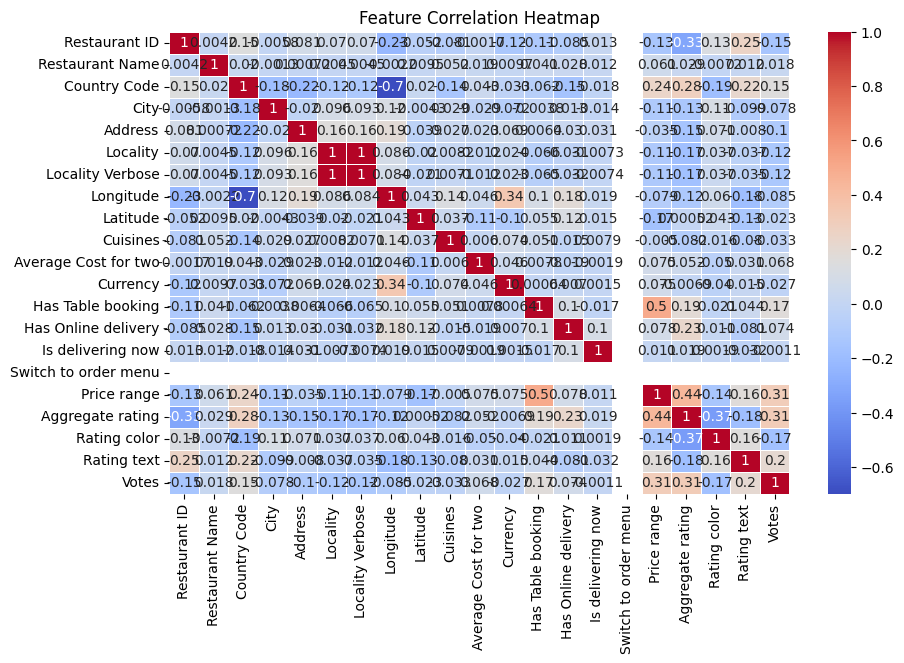

In [15]:
# Correlation heatmap (using encoded dataframe to avoid errors)
if not df_encoded.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("Skipping correlation heatmap as df_encoded is empty.")

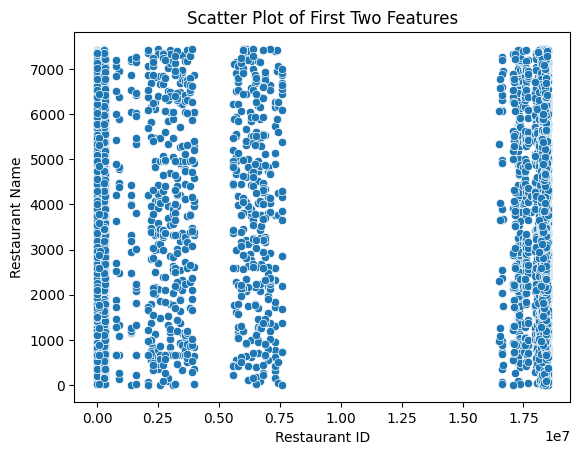

In [31]:

# Scatter plot of two important numerical features
if len(num_cols) >= 2:
    sns.scatterplot(x=df_encoded[num_cols[0]], y=df_encoded[num_cols[1]])
    plt.title("Scatter Plot of First Two Features")
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.show()
else:
    print("Not enough numerical columns for scatter plot.")


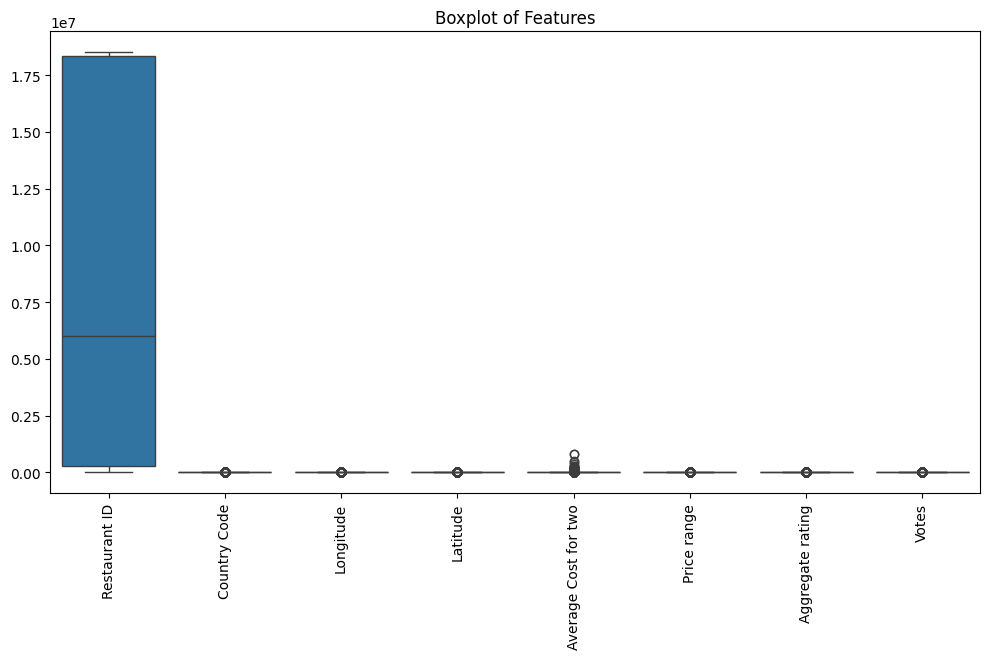

In [18]:

# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()

In [32]:

# Extract insights
if not df_encoded.empty:
    correlation_matrix = df_encoded.corr().abs().unstack().sort_values(ascending=False)
    highest_corr_features = correlation_matrix.index[1] if len(correlation_matrix) > 1 else (None, None)

    insights = [
        "1. Dataset contains {} rows and {} columns.".format(df.shape[0], df.shape[1]),
        "2. Missing values detected: {}".format(df.isnull().sum().sum()),
        "3. The highest correlated features are {} and {}".format(*highest_corr_features),
        "4. The distribution of {} is skewed towards higher values.".format(num_cols[0] if len(num_cols) > 0 else "N/A"),
        "5. Outliers detected in {} based on boxplot analysis.".format(df_encoded.columns[df_encoded.skew().abs() > 1].tolist()),
        "6. The dataset has {} categorical and {} numerical features.".format(len(df.select_dtypes(include='object').columns), len(num_cols)),
        "7. The most frequent category in {} is {}".format(df.select_dtypes(include='object').columns[0] if not df.select_dtypes(include='object').empty else "N/A", df[df.select_dtypes(include='object').columns[0]].mode()[0] if not df.select_dtypes(include='object').empty else "N/A"),
        "8. The average value of {} is {:.2f}".format(num_cols[1], df_encoded[num_cols[1]].mean()) if len(num_cols) > 1 else "N/A",
        "9. The standard deviation of {} is relatively high, indicating significant variance.".format(num_cols[2] if len(num_cols) > 2 else "N/A")
    ]
    print("Insights from the data:")
    for insight in insights:
        print(insight)
else:
    print("Skipping insights extraction as df_encoded is empty.")


Insights from the data:
1. Dataset contains 9551 rows and 21 columns.
2. Missing values detected: 9
3. The highest correlated features are Average Cost for two and Average Cost for two
4. The distribution of Restaurant ID is skewed towards higher values.
5. Outliers detected in ['Country Code', 'City', 'Longitude', 'Latitude', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Votes'] based on boxplot analysis.
6. The dataset has 13 categorical and 21 numerical features.
7. The most frequent category in Restaurant Name is Cafe Coffee Day
8. The average value of Restaurant Name is 3653.08
9. The standard deviation of Country Code is relatively high, indicating significant variance.
